# EDA on Titanic Dataset
**Syed Ahmed Ali Shah**  
*Internship Task — Coding Samurai*

---

**Objective:** Perform Exploratory Data Analysis (EDA) on the Titanic dataset to extract actionable insights about survival patterns and prepare the data for further modelling. This notebook is presentation-ready with clear sections, explanatory markdown cells, and a final summary of insights and next steps.


## Table of Contents
1. [Dataset Overview](#Dataset-Overview)  
2. [Data Cleaning & Feature Engineering](#Data-Cleaning-&-Feature-Engineering)  
3. [Univariate Analysis](#Univariate-Analysis)  
4. [Bivariate & Multivariate Analysis](#Bivariate-&-Multivariate-Analysis)  
5. [Feature Encoding & Correlation](#Feature-Encoding-&-Correlation)  
6. [Conclusions & Key Insights](#Conclusions-&-Key-Insights)  

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df=pd.read_csv(r"C:\Users\hp\Downloads\train.csv")

In [3]:
df.shape

(891, 12)

In [6]:
#Gives an overview of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#This gives detailed info about the dataset in terms of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Sums the total null values in each columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
#  FEW KEYPOINTS 
# 1. THREE COLUMNS HAVE NULL VALUES AGE, CABIN AND EMBARKED.
# 2. A STAGGERING OF 70% VALUES ARE MISSING IN THE CABIN COLUMN HAVE TO DROP.
# 3. FEW COLUMNS HAVE INCORRECT DATATYPE.

In [10]:
# DROPPING CABIN COLUMN
df.drop(columns=['Cabin'],inplace=True)

In [11]:
# FILLING THE MISSING VALUES FOR THE AGE COLUMN
# USING MEAN--- STRATEGY
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
# Imputing missing values for embarked
# Finding the most appeared values in embarked
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
df['Embarked'] = df['Embarked'].fillna('S')

In [15]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [16]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [18]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('category')
df['Embarked']=df['Embarked'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    category
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(5), float64(1), int64(3), object(2)
memory usage: 49.5+ KB


In [20]:
df.describe()

,PassengerId,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.523008,0.381594,32.204208
std,257.353842,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,0.000000,31.000000
max,891.000000,8.000000,6.000000,512.329200


Out of 891, 62% people died in the accident


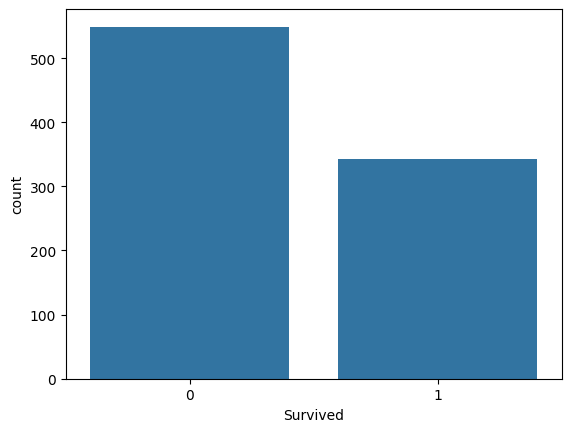

In [24]:
#Univariate Analysis
sns.countplot(x='Survived', data=df)
death_percent = round((df['Survived'].value_counts().values[0]/891)*100)
print("Out of 891, {}% people died in the accident".format(death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


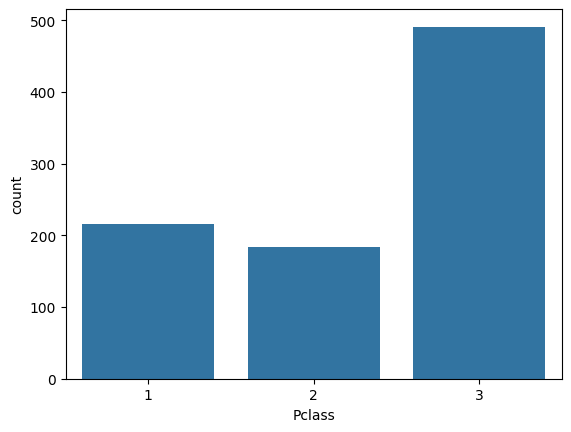

In [27]:
sns.countplot(x='Pclass', data=df)
print((df['Pclass'].value_counts()/891)*100)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


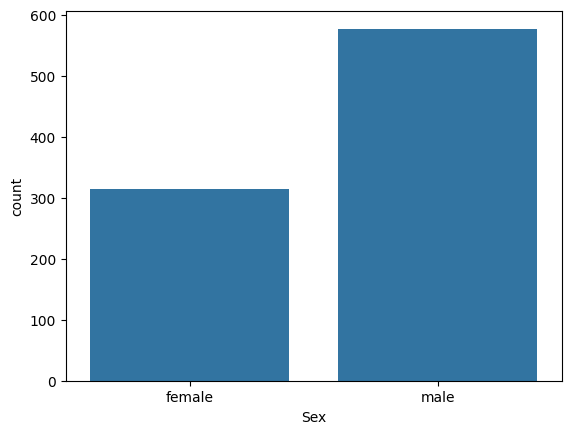

In [28]:
sns.countplot(x='Sex', data=df)
print((df['Sex'].value_counts()/891)*100)

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


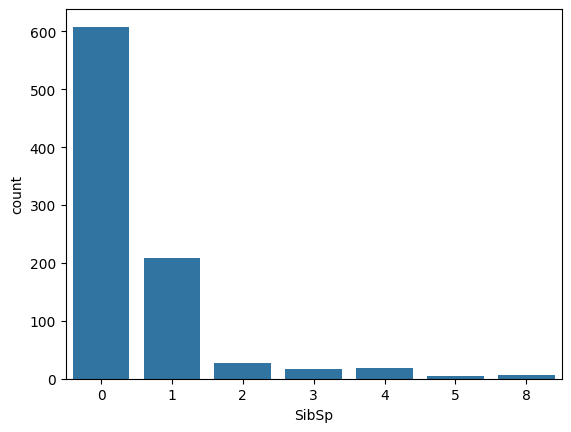

In [29]:
sns.countplot(x='SibSp', data=df)
print((df['SibSp'].value_counts()/891)*100)

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


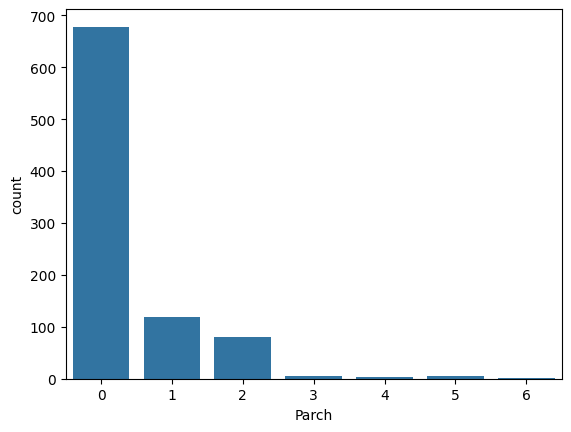

In [31]:
sns.countplot(x='Parch', data=df)
print((df['Parch'].value_counts()/891)*100)

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


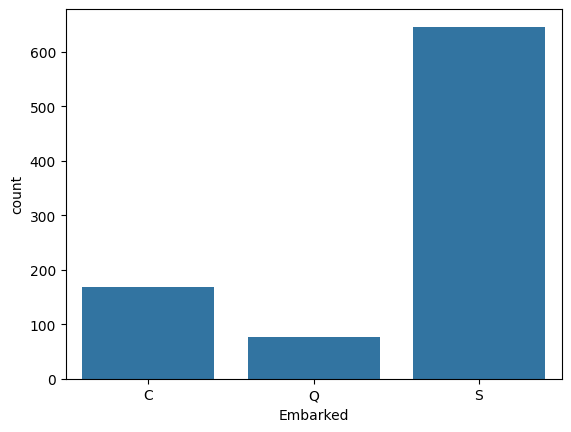

In [32]:
sns.countplot(x='Embarked', data=df)
print((df['Embarked'].value_counts()/891)*100)

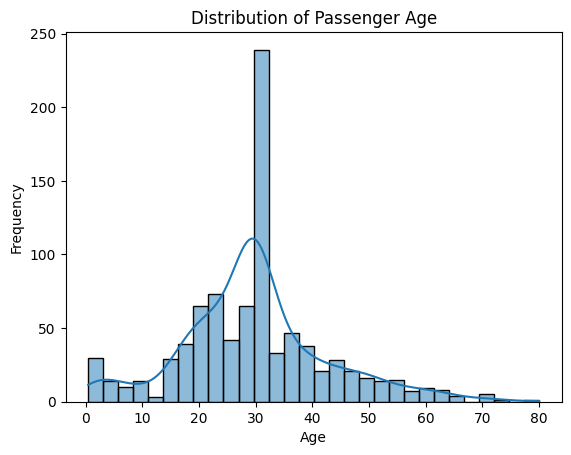

In [37]:
sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Passenger Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

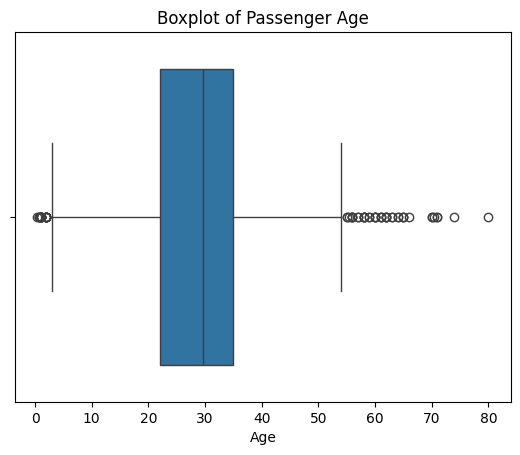

In [39]:
sns.boxplot(x='Age', data=df)
plt.title("Boxplot of Passenger Age")
plt.show()

In [43]:
print("People between age of 60 and 70 are", df[(df['Age'] > 60) & (df['Age'] < 70)].shape[0])
print("People age between 70 and 75 are", df[(df['Age'] >= 70) & (df['Age'] <= 75)].shape[0])
print("People greater than age of 75 are", df[df['Age'] > 75].shape[0])

print('-' * 50)

print("People with age between 0 and 1 are", df[df['Age'] < 1].shape[0])

People between age of 60 and 70 are 15
People age between 70 and 75 are 6
People greater than age of 75 are 1
--------------------------------------------------
People with age between 0 and 1 are 7


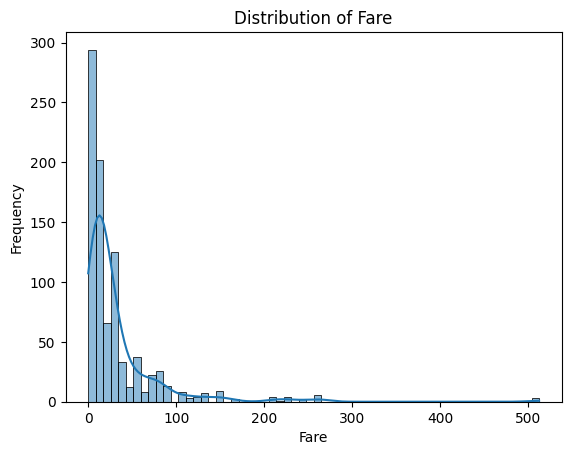

In [44]:
sns.histplot(df['Fare'], kde=True)
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

In [46]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


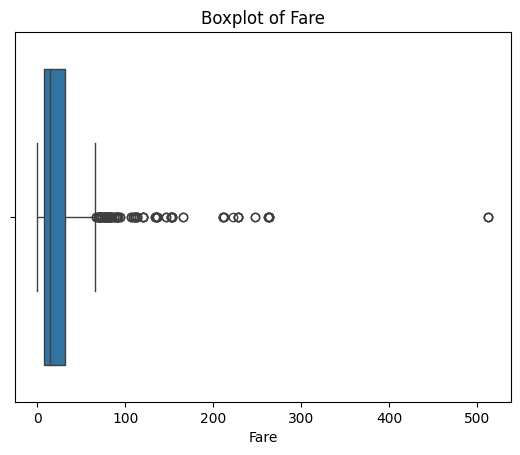

In [47]:
sns.boxplot(x='Fare', data=df)
plt.title("Boxplot of Fare")
plt.show()

In [49]:
print("People with fare in between $200 and $300 are",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare greater than $300 are",df[(df['Fare']>300)].shape[0])

People with fare in between $200 and $300 are 17
People with fare greater than $300 are 3


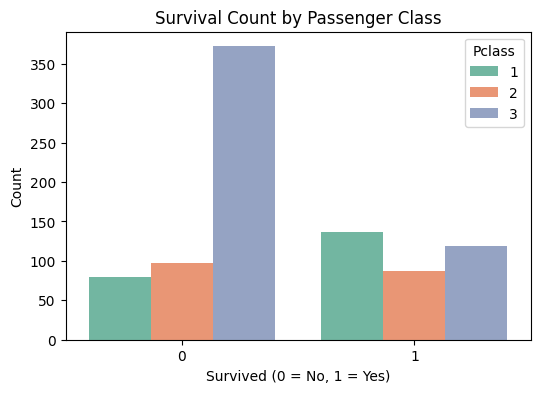


Survival Count by Passenger Class:

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Survival Percentage by Passenger Class (%):

Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2


In [57]:
# Countplot (visual comparison)
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set2')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Crosstab (numerical summary)
table = pd.crosstab(df['Pclass'], df['Survived'])
print("\nSurvival Count by Passenger Class:\n")
print(table)

# Percentage version
percent_table = table.apply(lambda r: round((r/r.sum())*100, 1), axis=1)
print("\nSurvival Percentage by Passenger Class (%):\n")
print(percent_table)

plt.show()

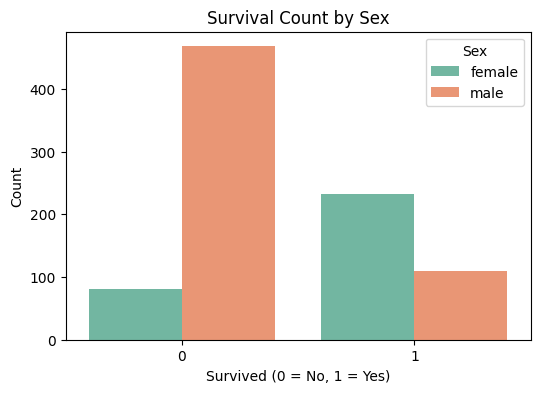


Survival Count by Sex:

Survived    0    1
Sex               
female     81  233
male      468  109

Survival Percentage by Sex (%):

Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9


In [58]:
# Countplot (visual comparison)
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')
plt.title('Survival Count by Sex')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Crosstab (numerical summary)
table = pd.crosstab(df['Sex'], df['Survived'])
print("\nSurvival Count by Sex:\n")
print(table)

# Percentage version
percent_table = table.apply(lambda r: round((r/r.sum())*100, 1), axis=1)
print("\nSurvival Percentage by Sex (%):\n")
print(percent_table)

plt.show()

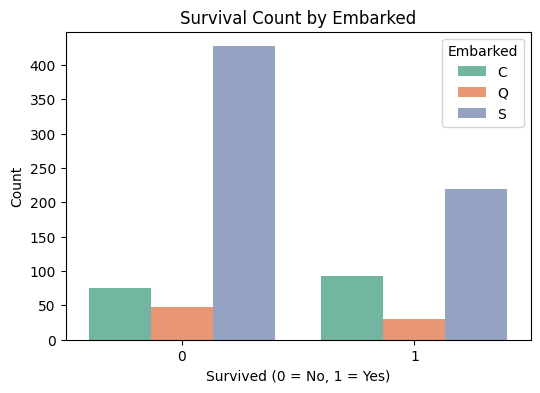


Survival Count by Embarked:

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219

Survival Percentage by Embarked (%):

Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.1  33.9


In [60]:
# Countplot (visual comparison)
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Embarked', data=df, palette='Set2')
plt.title('Survival Count by Embarked')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Crosstab (numerical summary)
table = pd.crosstab(df['Embarked'], df['Survived'])
print("\nSurvival Count by Embarked:\n")
print(table)

# Percentage version
percent_table = table.apply(lambda r: round((r/r.sum())*100, 1), axis=1)
print("\nSurvival Percentage by Embarked (%):\n")
print(percent_table)

plt.show()

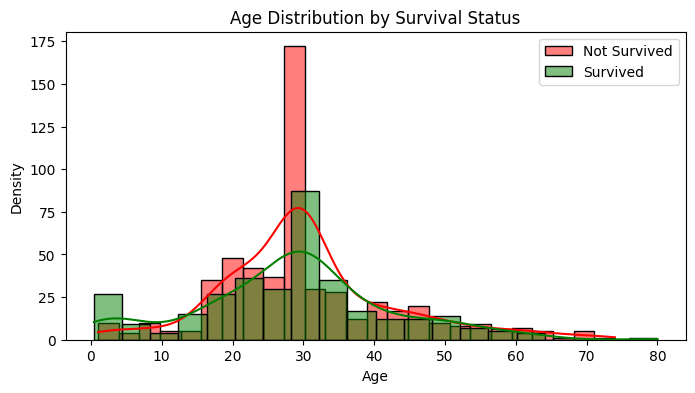

In [66]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['Survived']==0]['Age'], color='red', kde=True, label='Not Survived')
sns.histplot(df[df['Survived']==1]['Age'], color='green', kde=True, label='Survived')
plt.legend()
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

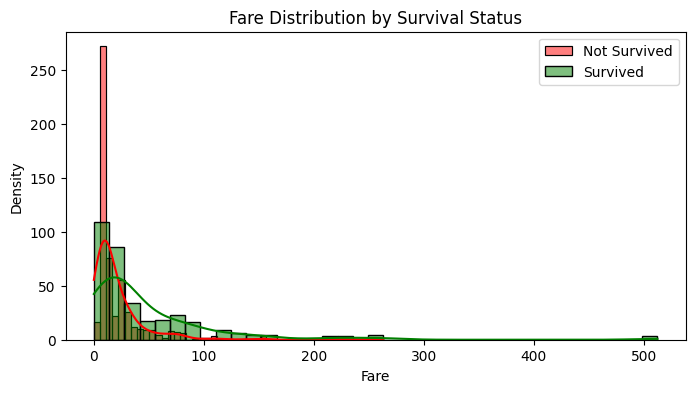

In [65]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['Survived']==0]['Fare'], color='red', kde=True, label='Not Survived')
sns.histplot(df[df['Survived']==1]['Fare'], color='green', kde=True, label='Survived')
plt.legend()
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

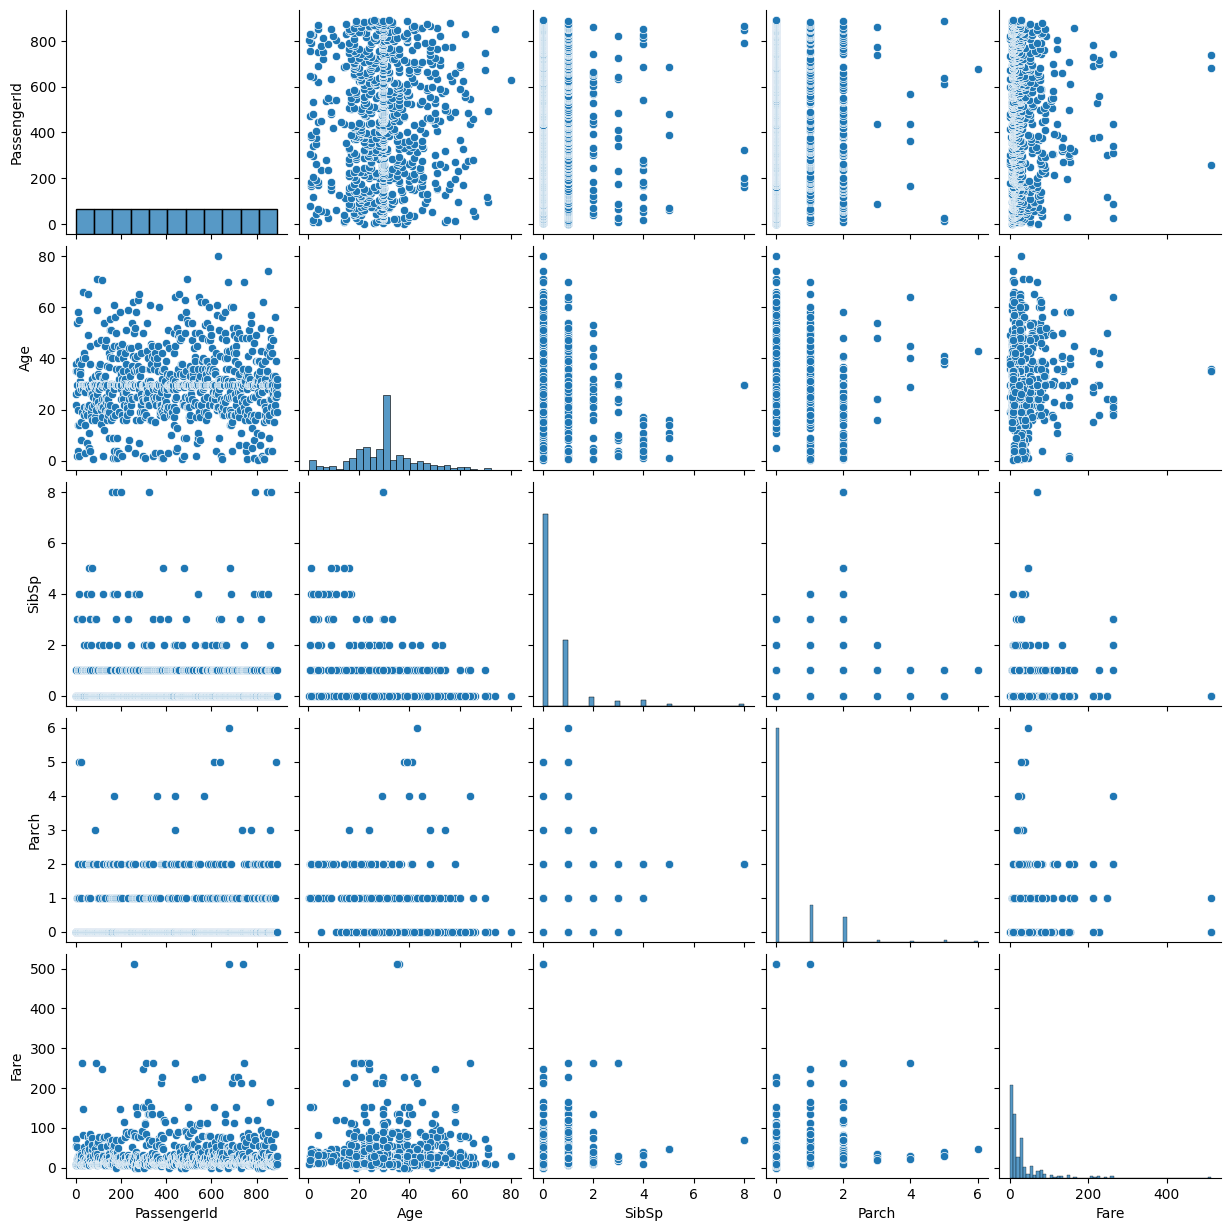

In [67]:
sns.pairplot(df)

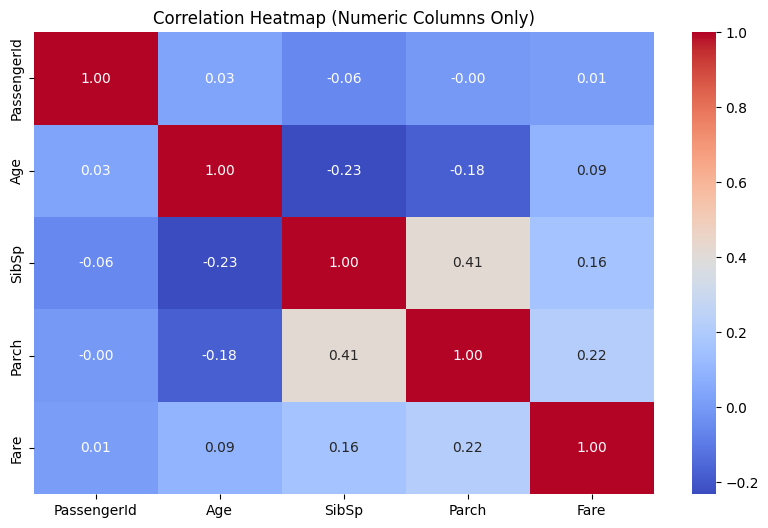

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

In [70]:
#Feature Engineering
# We will create new column of family which will be sum of SibSp and Parch cols
df['Family_Size']=df['SibSp'] + df['Parch']

In [72]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,1


In [77]:
#Engineering new feature 
def family_type(number):
    if number == 0:
        return 'Alone'
    elif number > 0 and number <= 4:
        return 'Medium'
    else:
        return 'Large'

In [79]:
df['family_type']=df['Family_Size'].apply(family_type)

In [86]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,Alone
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,0,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,0,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,4,Medium
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,2,Medium
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,1,Medium


In [87]:
#Dropping columns
df.drop(columns=['SibSp','Family_Size','Parch'],inplace=True)

In [88]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,Alone


In [90]:
# Crosstab (numerical summary)
table = pd.crosstab(df['family_type'], df['Survived'])
print("\nSurvival Count by Family Type:\n")
print(table)

# Percentage version
percent_table = table.apply(lambda r: round((r/r.sum())*100, 1), axis=1)
print("\nSurvival Percentage by Family Type (%):\n")
print(percent_table)

plt.show()


Survival Count by Family Type:

Survived       0    1
family_type          
Alone        374  163
Large         40    7
Medium       135  172

Survival Percentage by Family Type (%):

Survived        0     1
family_type            
Alone        69.6  30.4
Large        85.1  14.9
Medium       44.0  56.0


In [91]:
#Handling outliers
df=df[df['Age']<(df['Age'].mean()+3*df['Age'].std())]

In [92]:
df.shape

(884, 10)

In [95]:
# Finding quartiles
Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df ['Fare'],75)
outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)
df = df[(df['Fare'] > outlier_low) & (df['Fare'] < outlier_high)]

## Conclusions & Key Insights

**Key takeaways**
- **Gender:** Females show a notably higher survival rate compared to males (consistent with `women and children first` evacuation behavior).
- **Passenger Class (Pclass):** Higher classes (1st class) generally have higher survival rates than lower classes (3rd class).
- **Fare:** Passengers paying higher fares tend to have higher survival rates — fare is correlated with class and access to lifeboats.
- **Age:** Survival probability varies with age — children and younger adults often had higher survival rates than older passengers in many analyses.
- **Family Size / Type:** Family composition impacts survival: being alone vs. small/medium family vs. large families can influence outcomes — summarize from your `family_type` analysis.
- **Encoded Features:** One-hot encoded columns (e.g., `Sex_male`, `Embarked_Q`, `Pclass_2`, `Pclass_3`, `family_type_Medium`, `family_type_Large`) are ready for modeling.

**Acknowledgements**
- Completed as part of an internship task at **Coding Samurai**.
- Author: **Syed Ahmed Ali Shah**.